# 1) Required Libraries

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import SpectralClustering
import itertools

# 2) Read Dataset


In [3]:
def read_facebook_dataset(file_path):
  G = nx.Graph()
  with open(file_path, 'r') as file:
    for line in file:
      if line.startswith('#')  or len(line.strip())==0:
        continue

      edge = line.strip().split()
      node1 = int(edge[0])
      node2 = int(edge[1])
      G.add_edge(node1, node2)
  return G

In [4]:
dataset_file = "/content/drive/MyDrive/UL/Project Dataset/facebook_combined.txt"
graph = read_facebook_dataset(dataset_file)

# 3) Infos about Dataset


In [5]:
# Nombre de nœuds et d'arêtes
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()

# Degré de chaque nœud
degrees = dict(graph.degree())

# Noeud avec degré maximum
max_degree_node = max(degrees, key=degrees.get)
max_degree = degrees[max_degree_node]

# Noeud avec degré minimum
min_degree_node = min(degrees, key=degrees.get)
min_degree = degrees[min_degree_node]

# Moyenne des degrés
avg_degree = sum(degrees.values()) / num_nodes

# Densité du graphe
density = nx.density(graph)

# Vérifier si le graphe est connexe
is_connected = nx.is_connected(graph)

# Diamètre (si connexe)
diameter = nx.diameter(graph) if is_connected else "Non défini (graphe non connexe)"

# Affichage des infos
print("📊 Informations sur le graphe Facebook")
print(f"Nombre de nœuds     : {num_nodes}")
print(f"Nombre d’arêtes    : {num_edges}")
print(f"Noeud max degré    : {max_degree_node} (degré = {max_degree})")
print(f"Noeud min degré    : {min_degree_node} (degré = {min_degree})")
print(f"Degré moyen        : {avg_degree:.2f}")
print(f"Densité du graphe  : {density:.4f}")
print(f"Graphe connexe     : {is_connected}")
print(f"Diamètre du graphe : {diameter}")

📊 Informations sur le graphe Facebook
Nombre de nœuds     : 4039
Nombre d’arêtes    : 88234
Noeud max degré    : 107 (degré = 1045)
Noeud min degré    : 11 (degré = 1)
Degré moyen        : 43.69
Densité du graphe  : 0.0108
Graphe connexe     : True
Diamètre du graphe : 8


In [6]:
top_5 = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 des nœuds avec le plus haut degré :")
for node, deg in top_5:
    print(f" - Node {node} : degré {deg}")


Top 5 des nœuds avec le plus haut degré :
 - Node 107 : degré 1045
 - Node 1684 : degré 792
 - Node 1912 : degré 755
 - Node 3437 : degré 547
 - Node 0 : degré 347


In [7]:
top_5 = sorted(degrees.items(), key=lambda x: x[1], reverse=False)[:5]
print("Top 5 des nœuds avec le plus haut degré :")
for node, deg in top_5:
    print(f" - Node {node} : degré {deg}")


Top 5 des nœuds avec le plus haut degré :
 - Node 11 : degré 1
 - Node 12 : degré 1
 - Node 15 : degré 1
 - Node 18 : degré 1
 - Node 37 : degré 1


In [8]:
num_components = nx.number_connected_components(graph)
largest_cc = max(nx.connected_components(graph), key=len)
print(f"Nombre de composantes connexes : {num_components}")
print(f"Taille de la plus grande composante connexe : {len(largest_cc)}")


Nombre de composantes connexes : 1
Taille de la plus grande composante connexe : 4039


In [9]:
avg_clustering = nx.average_clustering(graph)
print(f"Coefficient de clustering moyen : {avg_clustering:.4f}")


Coefficient de clustering moyen : 0.6055


In [10]:
if nx.is_connected(graph):
    avg_path_length = nx.average_shortest_path_length(graph)
    print(f"Longueur moyenne des plus courts chemins : {avg_path_length:.4f}")
else:
    print("Le graphe n’est pas connexe. Impossible de calculer la longueur moyenne.")


Longueur moyenne des plus courts chemins : 3.6925


# 4) Initial Graph Visualization

In [11]:
pos = nx.spring_layout(graph, seed=5)

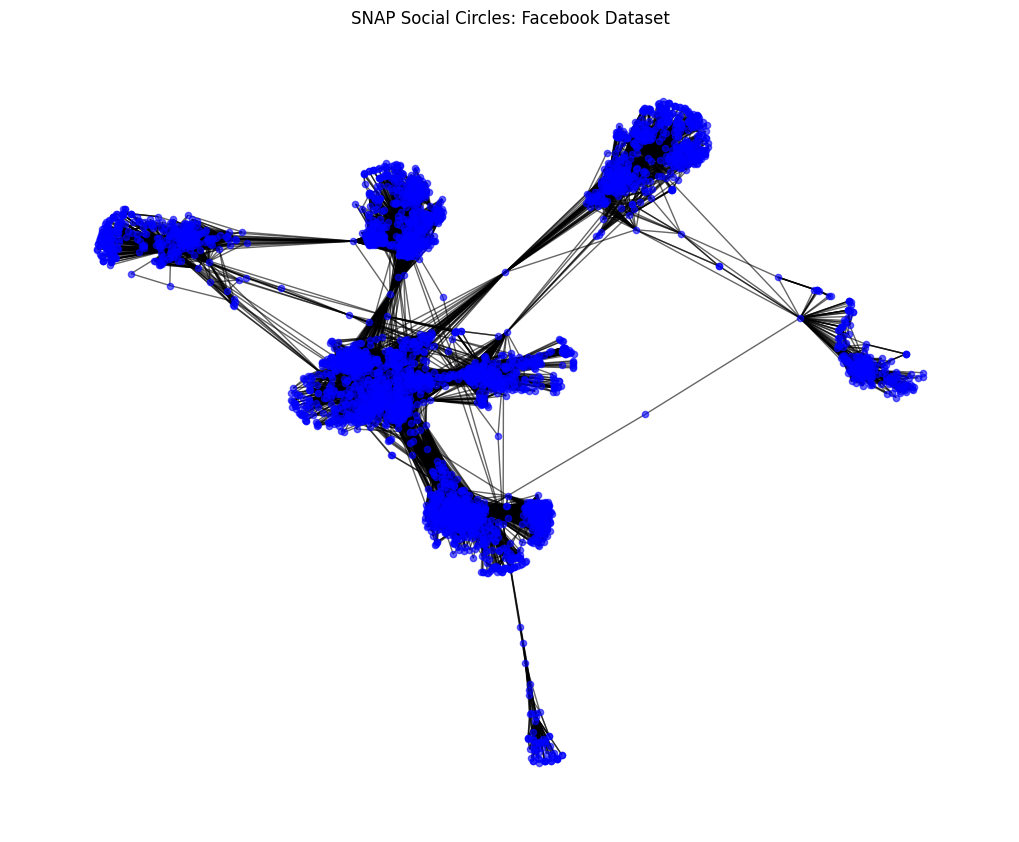

In [12]:
plt.figure(figsize=(10,8))
nx.draw(graph, pos, node_size=20, node_color="blue", alpha=0.6, with_labels=False)
plt.title("SNAP Social Circles: Facebook Dataset")
plt.show()

# 5) Degree Distribution

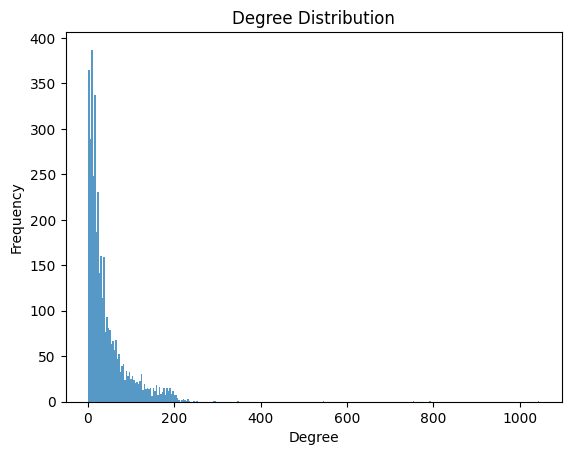

In [13]:
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
plt.hist(degree_sequence, bins=300, alpha=0.75)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

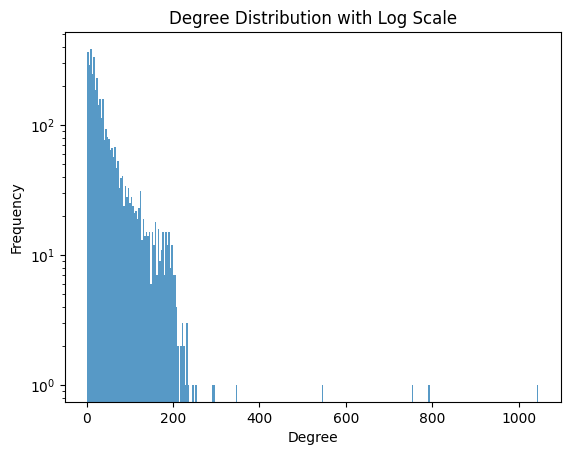

In [14]:
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
plt.hist(degree_sequence, bins=300, alpha=0.75, log=True)
plt.title("Degree Distribution with Log Scale")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

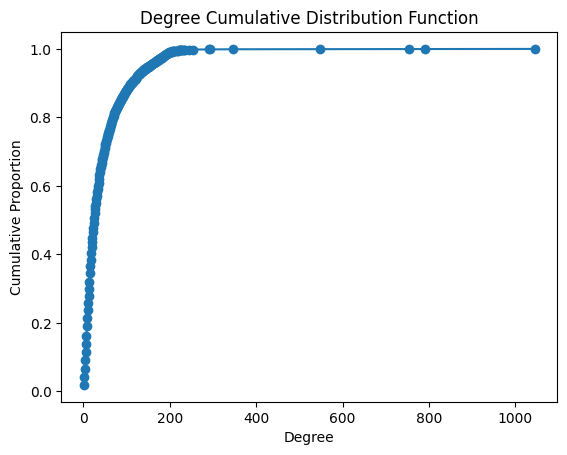

In [15]:
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
unique_degrees, degree_counts = np.unique(degree_sequence, return_counts=True)
cumulative_degree_counts = np.cumsum(degree_counts)
cumulative_proportions = cumulative_degree_counts / len(degree_sequence)

# Plot the cumulative distribution function
plt.plot(unique_degrees, cumulative_proportions, marker='o', linestyle='-')
plt.title("Degree Cumulative Distribution Function")
plt.xlabel("Degree")
plt.ylabel("Cumulative Proportion")
#plt.xscale('log')  # Set x-axis to logarithmic scale for better visualization
plt.show()

#5) Centrality Measures

##5.1) Degree Centrality

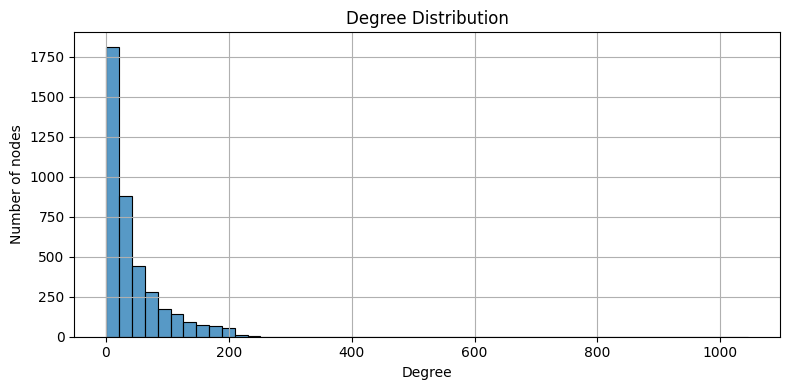

In [16]:
import seaborn as sns

degrees = [d for n, d in graph.degree()]
plt.figure(figsize=(8, 4))
sns.histplot(degrees, bins=50, kde=False)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
degree_centrality = nx.degree_centrality(graph)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 10 users by Degree Centrality:")
for node, centrality in sorted_degree_centrality[:10]:
    print(f"User {node}: Degree Centrality = {centrality}")

Top 10 users by Degree Centrality:
User 107: Degree Centrality = 0.258791480931154
User 1684: Degree Centrality = 0.1961367013372957
User 1912: Degree Centrality = 0.18697374938088163
User 3437: Degree Centrality = 0.13546310054482416
User 0: Degree Centrality = 0.08593363051015354
User 2543: Degree Centrality = 0.07280832095096582
User 2347: Degree Centrality = 0.07206537890044576
User 1888: Degree Centrality = 0.0629024269440317
User 1800: Degree Centrality = 0.06067360079247152
User 1663: Degree Centrality = 0.058197127290737984


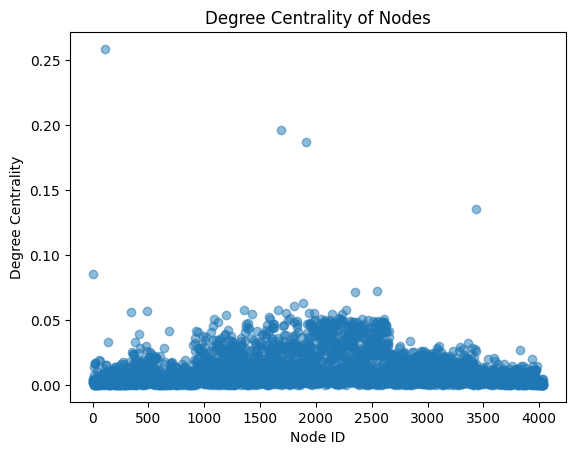

In [18]:
nodes = list(degree_centrality.keys())
centrality_values = list(degree_centrality.values())

# Plot a scatter plot of degree centrality
plt.scatter(nodes, centrality_values, alpha=0.5)
plt.title("Degree Centrality of Nodes")
plt.xlabel("Node ID")
plt.ylabel("Degree Centrality")
plt.show()

##5.2) Betweness Centrality

In [19]:
betweenness_centrality = nx.betweenness_centrality(graph)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("🔹 Top 10 utilisateurs par Betweenness Centrality :")
for node, centrality in sorted_betweenness[:10]:
    print(f"User {node}: Betweenness Centrality = {centrality:.4f}")

🔹 Top 10 utilisateurs par Betweenness Centrality :
User 107: Betweenness Centrality = 0.4805
User 1684: Betweenness Centrality = 0.3378
User 3437: Betweenness Centrality = 0.2361
User 1912: Betweenness Centrality = 0.2293
User 1085: Betweenness Centrality = 0.1490
User 0: Betweenness Centrality = 0.1463
User 698: Betweenness Centrality = 0.1153
User 567: Betweenness Centrality = 0.0963
User 58: Betweenness Centrality = 0.0844
User 428: Betweenness Centrality = 0.0643


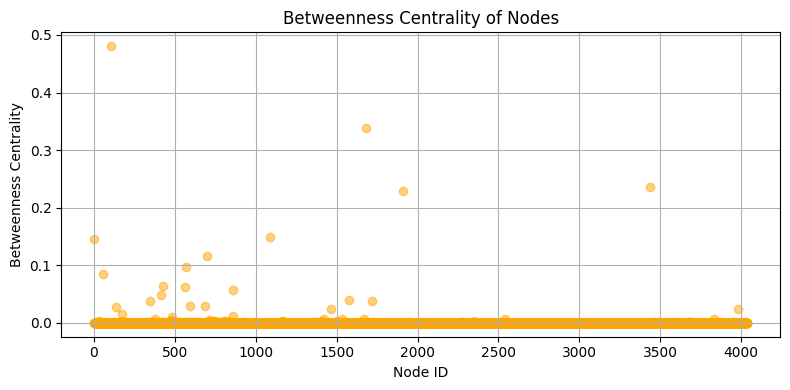

In [20]:
plt.figure(figsize=(8, 4))
plt.scatter(betweenness_centrality.keys(), betweenness_centrality.values(), alpha=0.5, color='orange')
plt.title("Betweenness Centrality of Nodes")
plt.xlabel("Node ID")
plt.ylabel("Betweenness Centrality")
plt.grid(True)
plt.tight_layout()
plt.show()

##5.3) Closeness Centrality

In [21]:
closeness_centrality = nx.closeness_centrality(graph)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("🔹 Top 10 utilisateurs par Closeness Centrality :")
for node, centrality in sorted_closeness[:10]:
    print(f"User {node}: Closeness Centrality = {centrality:.4f}")

🔹 Top 10 utilisateurs par Closeness Centrality :
User 107: Closeness Centrality = 0.4597
User 58: Closeness Centrality = 0.3974
User 428: Closeness Centrality = 0.3948
User 563: Closeness Centrality = 0.3939
User 1684: Closeness Centrality = 0.3936
User 171: Closeness Centrality = 0.3705
User 348: Closeness Centrality = 0.3699
User 483: Closeness Centrality = 0.3698
User 414: Closeness Centrality = 0.3695
User 376: Closeness Centrality = 0.3666


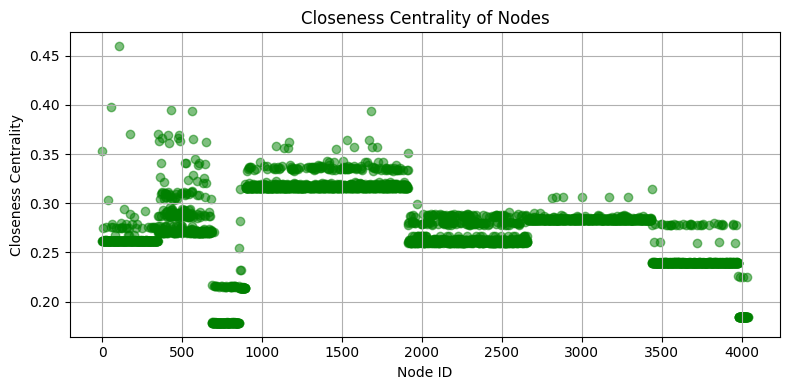

In [22]:
plt.figure(figsize=(8, 4))
plt.scatter(closeness_centrality.keys(), closeness_centrality.values(), alpha=0.5, color='green')
plt.title("Closeness Centrality of Nodes")
plt.xlabel("Node ID")
plt.ylabel("Closeness Centrality")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6) K-Means Clustering

In [23]:
# Conversion to adjacency matrix
adjmatrix = nx.adjacency_matrix(graph).todense()

In [24]:
adjmatrix

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

k = 6, Calinski-Harabasz Score = 263.64
k = 7, Calinski-Harabasz Score = 288.49
k = 8, Calinski-Harabasz Score = 275.84
k = 9, Calinski-Harabasz Score = 269.50
k = 10, Calinski-Harabasz Score = 246.29
k = 11, Calinski-Harabasz Score = 227.24
k = 12, Calinski-Harabasz Score = 209.05
k = 13, Calinski-Harabasz Score = 197.47
k = 14, Calinski-Harabasz Score = 185.66
k = 15, Calinski-Harabasz Score = 176.51
k = 16, Calinski-Harabasz Score = 169.66
k = 17, Calinski-Harabasz Score = 162.84
k = 18, Calinski-Harabasz Score = 155.92
k = 19, Calinski-Harabasz Score = 154.14
k = 20, Calinski-Harabasz Score = 148.92


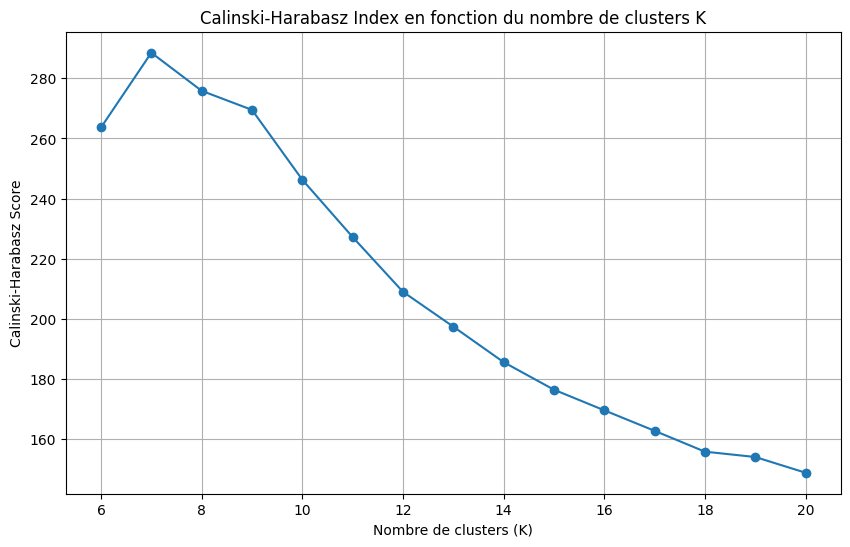

In [25]:
ch_scores = []
k_values = list(range(6, 21))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(adjmatrix)

    # Calcul du Calinski-Harabasz Index
    score = calinski_harabasz_score(adjmatrix, cluster_labels)
    ch_scores.append(score)
    print(f"k = {k}, Calinski-Harabasz Score = {score:.2f}")

# Tracé du graphe
plt.figure(figsize=(10, 6))
plt.plot(k_values, ch_scores, marker='o')
plt.title("Calinski-Harabasz Index en fonction du nombre de clusters K")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Calinski-Harabasz Score")
plt.grid(True)
plt.show()

In [26]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [27]:
k_values = list(range(6, 21))
silhouette_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(adjmatrix)

    sil_score = silhouette_score(adjmatrix, labels)
    db_score = davies_bouldin_score(adjmatrix, labels)

    silhouette_scores.append(sil_score)
    davies_bouldin_scores.append(db_score)

    print(f"k = {k}, Silhouette = {sil_score:.4f}, Davies-Bouldin = {db_score:.4f}")



k = 6, Silhouette = 0.2699, Davies-Bouldin = 1.8817
k = 7, Silhouette = 0.2861, Davies-Bouldin = 1.8154
k = 8, Silhouette = 0.2404, Davies-Bouldin = 1.9508
k = 9, Silhouette = 0.2478, Davies-Bouldin = 1.9208
k = 10, Silhouette = 0.1715, Davies-Bouldin = 2.0425
k = 11, Silhouette = 0.0481, Davies-Bouldin = 2.6349
k = 12, Silhouette = 0.0507, Davies-Bouldin = 2.5930
k = 13, Silhouette = 0.0528, Davies-Bouldin = 2.5572
k = 14, Silhouette = 0.0536, Davies-Bouldin = 2.5433
k = 15, Silhouette = 0.0556, Davies-Bouldin = 2.7319
k = 16, Silhouette = 0.0584, Davies-Bouldin = 2.6868
k = 17, Silhouette = 0.0587, Davies-Bouldin = 2.6695
k = 18, Silhouette = 0.0586, Davies-Bouldin = 2.7048
k = 19, Silhouette = 0.0631, Davies-Bouldin = 2.6322
k = 20, Silhouette = 0.0638, Davies-Bouldin = 2.6273


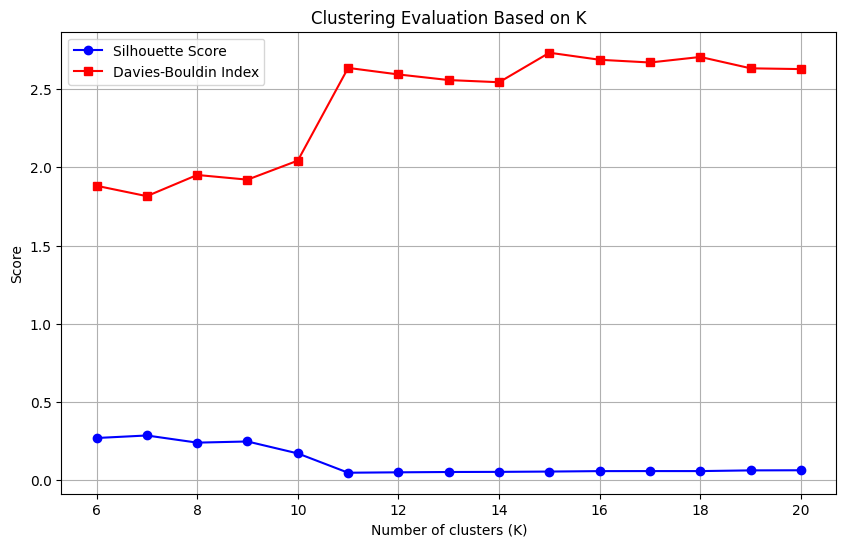

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Tracer Silhouette Score
plt.plot(k_values, silhouette_scores, marker='o', color='blue', label='Silhouette Score')

# Tracer Davies-Bouldin Index (à minimiser)
plt.plot(k_values, davies_bouldin_scores, marker='s', color='red', label='Davies-Bouldin Index')

plt.title("Clustering Evaluation Based on K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeanclusters = kmeans.fit_predict(adjmatrix)

In [30]:
# Convert cluster labels to community format
kmeancommunities = [[] for _ in range(num_clusters)]
for i, label in enumerate(kmeanclusters):
    kmeancommunities[label].append(i)

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


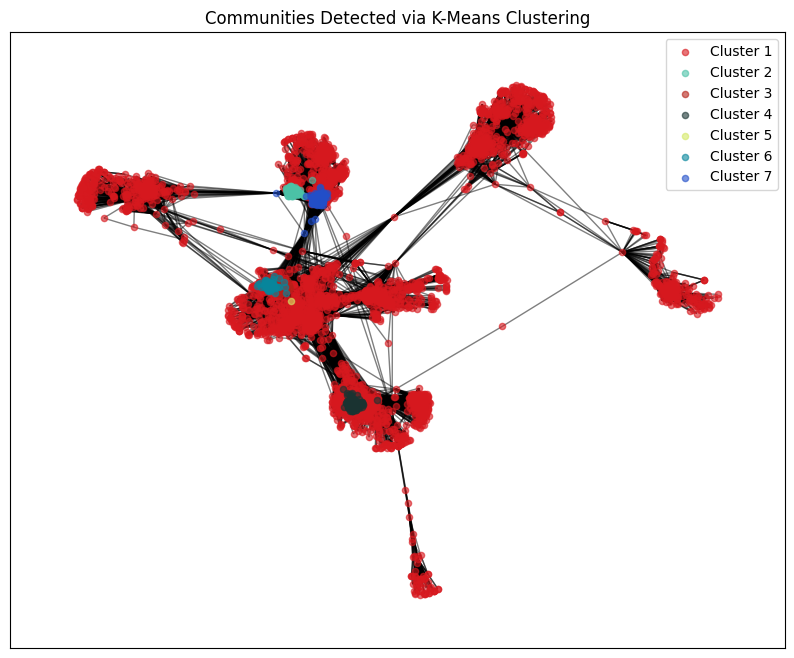

In [31]:
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    nodes_in_cluster = [node for node, cluster in zip(graph.nodes(), kmeanclusters) if cluster == i]
    nx.draw_networkx_nodes(graph, pos, nodelist=nodes_in_cluster, node_color=np.random.rand(3,),
                           node_size=20, alpha=0.6, label=f'Cluster {i + 1}')
nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.title('Communities Detected via K-Means Clustering')
plt.legend()
plt.show()

## 6.1) Metrics for K-Means

In [32]:
kmeans_modularity_score = nx.algorithms.community.modularity(graph, kmeancommunities)

In [33]:
# Calculate normalized cut ratio
cut_ratios = []
for i in range(num_clusters):
    cluster_nodes = np.where(kmeanclusters == i)[0]
    cut_size = nx.cut_size(graph, cluster_nodes)
    normalized_cut = cut_size / len(cluster_nodes)
    cut_ratios.append(normalized_cut)
kmeans_normalized_cut_ratio = np.mean(cut_ratios)

In [34]:
kmeans_silhouette = silhouette_score(adjmatrix, kmeanclusters, metric="euclidean")

In [35]:
def kmcompactness(adj_matrix, kmeanclusters, num_clusters):
    compactness = []
    for i in range(num_clusters):
        cluster_indices = np.where(kmeanclusters == i)[0]
        cluster_points = adjmatrix[cluster_indices, :]
        cluster_centroid = np.mean(cluster_points, axis=0)
        distances = np.linalg.norm(cluster_points - cluster_centroid, axis=1)
        compactness.append(np.mean(distances))
    return np.mean(compactness)

In [36]:
kmeans_compactness = kmcompactness(adjmatrix, kmeanclusters, num_clusters)

In [37]:
kmeans_chbscore = calinski_harabasz_score(adjmatrix, kmeanclusters)

In [38]:
def cluster_separability(adjmatrix, kmeanclusters, num_clusters):
    centroids = []
    for i in range(num_clusters):
        cluster_indices = np.where(kmeanclusters == i)[0]
        cluster_points = adjmatrix[cluster_indices, :]
        cluster_centroid = np.mean(cluster_points, axis=0)
        centroids.append(cluster_centroid)

    # Calculate separability
    separability_sum = 0
    num_combinations = 0
    for i in range(num_clusters):
        for j in range(i + 1, num_clusters):
            separability_sum += np.linalg.norm(centroids[i] - centroids[j])
            num_combinations += 1

    separability = separability_sum / num_combinations
    return separability

In [39]:
kmeans_separability = cluster_separability(adjmatrix, kmeanclusters, num_clusters)

In [40]:
print(f"K Means Modularity: {kmeans_modularity_score}")
print(f"K Means Normalized Cut Ratio: {kmeans_normalized_cut_ratio}")
print(f"K Means Silhouette Score: {kmeans_silhouette}")
print(f"K Means Total Compactness: {kmeans_compactness}")
print(f"K Means Calinski Harabasz Score : {kmeans_chbscore}")
print(f"K Means Separability: {kmeans_separability}")

K Means Modularity: 0.017996613256339767
K Means Normalized Cut Ratio: 180.85584233617652
K Means Silhouette Score: 0.28610951805119317
K Means Total Compactness: 5.594897622304489
K Means Calinski Harabasz Score : 288.49462969639734
K Means Separability: 16.205703400869304


# 7) Labelled Propagation Algorithm for Community Detection

In [41]:
label_propagation_communities = nx.algorithms.community.label_propagation_communities(graph)
print(len(label_propagation_communities))
print("Detected Communities using Label Propagation Algorithm:")
for i, community in enumerate(label_propagation_communities):
    if len(community) >= 10:
        print(f"Community {i + 1}: {list(community)}")

44
Detected Communities using Label Propagation Algorithm:
Community 1: [0, 1, 3, 5, 7, 9, 10, 11, 12, 13, 15, 16, 18, 21, 22, 23, 25, 26, 27, 29, 30, 31, 37, 38, 39, 40, 43, 45, 47, 48, 50, 51, 54, 55, 56, 59, 60, 61, 62, 63, 65, 66, 67, 69, 72, 73, 74, 75, 76, 77, 79, 81, 82, 83, 84, 85, 87, 88, 96, 98, 103, 104, 105, 106, 109, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 141, 142, 146, 148, 153, 155, 156, 157, 158, 160, 161, 164, 165, 166, 168, 169, 170, 172, 176, 178, 183, 185, 186, 188, 190, 191, 199, 200, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 215, 221, 222, 223, 224, 228, 229, 231, 232, 234, 235, 236, 237, 238, 239, 240, 246, 247, 248, 250, 252, 257, 258, 260, 261, 265, 267, 268, 269, 270, 271, 272, 274, 276, 277, 280, 283, 285, 286, 287, 288, 290, 291, 292, 294, 295, 297, 298, 301, 303, 304, 308, 311, 313, 314, 315, 316, 317, 318, 322, 323, 324, 325, 329, 331, 332, 334, 335, 336, 338, 339, 340, 341, 342, 344, 345, 347]
Com

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


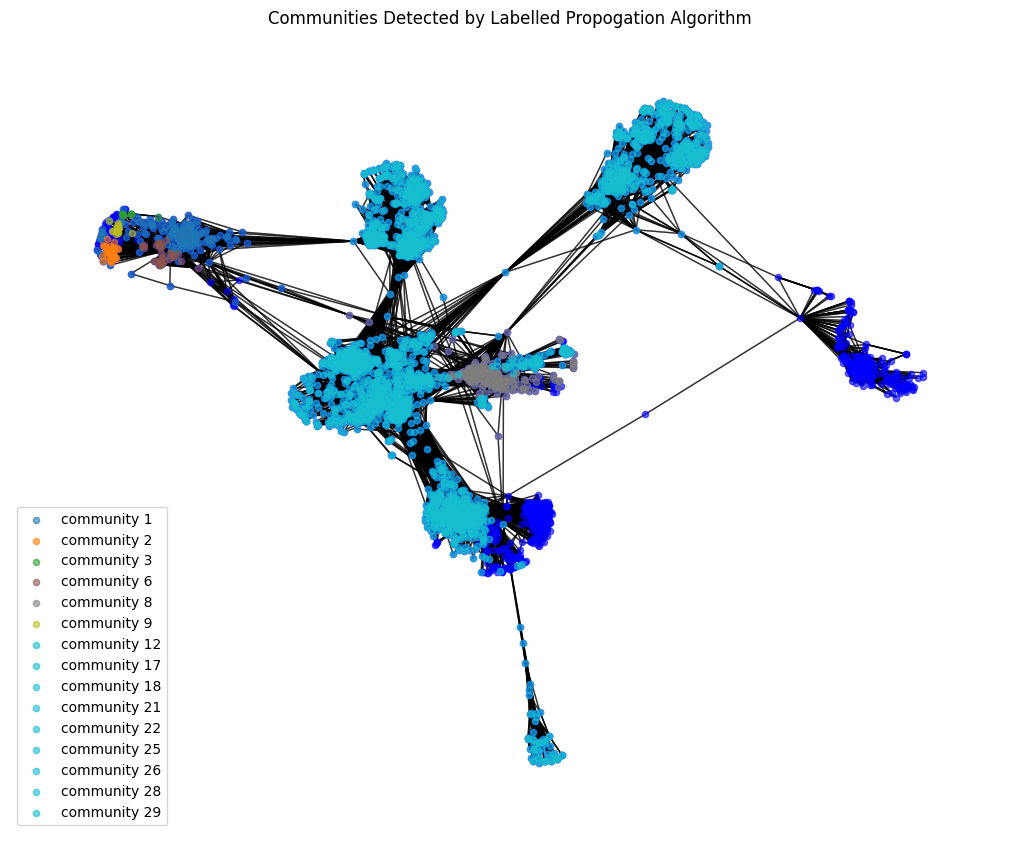

In [42]:
# Plot nodes without community information
plt.figure(figsize=(10, 8))
nx.draw(graph, pos, node_size=20, node_color="blue", alpha=0.6, with_labels=False)
plt.title("Communities Detected by Labelled Propogation Algorithm")

# Plot nodes with community information for the first 15 communities with more than 10 nodes
count = 0
for i, community in enumerate(label_propagation_communities):
    if len(community) >= 10:
        nx.draw_networkx_nodes(graph, pos, nodelist=community, node_color=plt.cm.tab10(i), node_size=20, alpha=0.6, label=f"community {i+1}")
        count += 1
    if count >= 15:
        break

nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.legend()
plt.show()

## 7.1) Metrics for Labelled Propagation Algorithm

In [43]:
lpa_modularity_score = nx.algorithms.community.modularity(graph, label_propagation_communities)

In [44]:
cut_ratios = []
for community in label_propagation_communities:
    cut_size = nx.cut_size(graph, community)
    normalized_cut = cut_size / len(community)
    cut_ratios.append(normalized_cut)
lpa_normalized_cut_ratio = np.mean(cut_ratios)

In [45]:
label_propagation_communities = [list(community) for community in label_propagation_communities]

In [46]:
cluster_labels = np.zeros(graph.number_of_nodes())
for i, community in enumerate(label_propagation_communities):
    cluster_labels[community] = i
lpa_silhouette = silhouette_score(nx.adjacency_matrix(graph).todense(), cluster_labels, metric='euclidean')

In [47]:
def calculate_community_compactness(adjmatrix, community):
    # Extract adjacency matrix for nodes in the community
    community_adjmatrix = adjmatrix[np.ix_(community, community)]
    # Calculate compactness as the average distance between nodes in the community
    compactness = np.mean(community_adjmatrix)
    return compactness

# Function to calculate sum of compactness for all communities
def total_compactness(communities, graph):
    # Convert graph to adjacency matrix
    adjmatrix = nx.adjacency_matrix(graph).todense()

    total_compactness = 0
    for community in communities:
        community_compactness = calculate_community_compactness(adjmatrix, community)
        total_compactness += community_compactness

    return total_compactness

In [48]:
lpa_compactness = total_compactness(label_propagation_communities, graph)
lpa_chbscore = calinski_harabasz_score(nx.adjacency_matrix(graph).todense(), cluster_labels)

In [49]:
def calculate_community_separability(adjmatrix, community1, community2):
    # Extract adjacency matrix for nodes in each community
    community1_adjmatrix = adjmatrix[np.ix_(community1, community1)]
    community2_adjmatrix = adjmatrix[np.ix_(community2, community2)]
    # Calculate separability as the average distance between nodes in different communities
    separability = np.mean(community1_adjmatrix) + np.mean(community2_adjmatrix)
    return separability

# Function to calculate separability of all communities
def calculate_separability(communities, graph):
    # Convert graph to adjacency matrix
    adjmatrix = nx.adjacency_matrix(graph).todense()

    total_separability = 0
    num_combinations = 0
    num_communities = len(communities)
    for i in range(num_communities):
        for j in range(i + 1, num_communities):
            community1 = communities[i]
            community2 = communities[j]
            community_separability = calculate_community_separability(adjmatrix, community1, community2)
            total_separability += community_separability
            num_combinations += 1

    return total_separability

In [50]:
lpa_separability = calculate_separability(label_propagation_communities, graph)

In [51]:
print(f"LPA Modularity: {lpa_modularity_score}")
print(f"LPA Normalized Cut Ratio: {lpa_normalized_cut_ratio}")
print(f"LPA Silhouette Score: {lpa_silhouette}")
print(f"LPA Compactness: {lpa_compactness}")
print(f"LPA Calinski Harabasz Score: {lpa_chbscore}")
print(f"LPA Separability: {lpa_separability}")

LPA Modularity: 0.7368407345348218
LPA Normalized Cut Ratio: 1.7332541547012335
LPA Silhouette Score: -0.3157669348819561
LPA Compactness: 9.012389493950169
LPA Calinski Harabasz Score: 7.407200997869708
LPA Separability: 387.5327482398569


# 8) Louvain

In [52]:
louvain_communities = nx.algorithms.community.greedy_modularity_communities(graph)

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


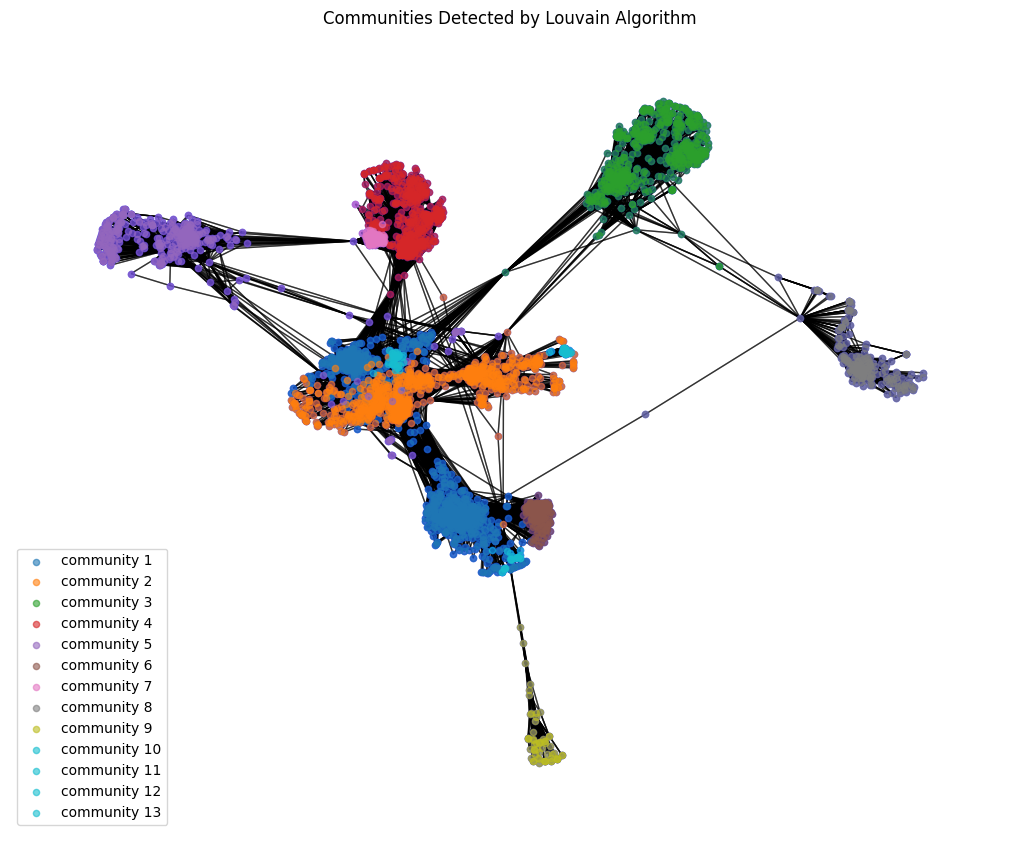

In [53]:
plt.figure(figsize=(10, 8))
nx.draw(graph, pos, node_size=20, node_color="blue", alpha=0.6, with_labels=False)
plt.title("Communities Detected by Louvain Algorithm")

# Plot nodes with community information
for i, community in enumerate(louvain_communities):
  nx.draw_networkx_nodes(graph, pos, nodelist=community, node_color=plt.cm.tab10(i), node_size=20, alpha=0.6, label=f"community {i+1}")
nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.legend()
plt.show()

In [54]:
louvain_communities = [list(community) for community in louvain_communities]

In [55]:
louvain_modularity_score = nx.algorithms.community.modularity(graph, louvain_communities)

## 8.1) Metrics for Louvain

In [56]:
cut_ratios = []
for community in louvain_communities:
    cut_size = nx.cut_size(graph, community)
    normalized_cut = cut_size / len(community)
    cut_ratios.append(normalized_cut)
louvain_normalized_cut_ratio = np.mean(cut_ratios)

In [57]:
cluster_labels = np.zeros(graph.number_of_nodes())
for i, community in enumerate(louvain_communities):
    cluster_labels[community] = i
louvain_silhouette = silhouette_score(nx.adjacency_matrix(graph).todense(), cluster_labels, metric='euclidean')

In [58]:
def calculate_community_compactness(adjmatrix, community):
    # Extract adjacency matrix for nodes in the community
    community_adjmatrix = adjmatrix[np.ix_(community, community)]
    # Calculate compactness as the average distance between nodes in the community
    compactness = np.mean(community_adjmatrix)
    return compactness

# Function to calculate sum of compactness for all communities
def total_compactness(communities, graph):
    # Convert graph to adjacency matrix
    adjmatrix = nx.adjacency_matrix(graph).todense()

    total_compactness = 0
    for community in communities:
        community_compactness = calculate_community_compactness(adjmatrix, community)
        total_compactness += community_compactness

    return total_compactness

In [59]:
louvain_compactness = total_compactness(louvain_communities, graph)
louvain_chbscore = calinski_harabasz_score(nx.adjacency_matrix(graph).todense(), cluster_labels)

In [60]:
def calculate_community_separability(adjmatrix, community1, community2):
    # Extract adjacency matrix for nodes in each community
    community1_adjmatrix = adjmatrix[np.ix_(community1, community1)]
    community2_adjmatrix = adjmatrix[np.ix_(community2, community2)]
    # Calculate separability as the average distance between nodes in different communities
    separability = np.mean(community1_adjmatrix) + np.mean(community2_adjmatrix)
    return separability

# Function to calculate separability of all communities
def calculate_separability(communities, graph):
    # Convert graph to adjacency matrix
    adjmatrix = nx.adjacency_matrix(graph).todense()

    total_separability = 0
    num_combinations = 0
    num_communities = len(communities)
    for i in range(num_communities):
        for j in range(i + 1, num_communities):
            community1 = communities[i]
            community2 = communities[j]
            community_separability = calculate_community_separability(adjmatrix, community1, community2)
            total_separability += community_separability
            num_combinations += 1

    return total_separability

In [61]:
louvain_separability = calculate_separability(louvain_communities, graph)

In [62]:
print(f"Louvain Modularity: {louvain_modularity_score}")
print(f"Louvain Normalized Cut Ratio: {louvain_normalized_cut_ratio}")
print(f"Louvain Silhouette Score: {louvain_silhouette}")
print(f"Louvain Compactness: {louvain_compactness}")
print(f"Louvain Calinski Harabasz Score: {louvain_chbscore}")
print(f"Louvain Separability: {louvain_separability}")

Louvain Modularity: 0.7773775199040279
Louvain Normalized Cut Ratio: 1.7549852359383116
Louvain Silhouette Score: -0.2501875285464944
Louvain Compactness: 0.45634880916931125
Louvain Calinski Harabasz Score: 16.371967129485043
Louvain Separability: 5.476185710031737


# 9) Girvan-Newman

Clusters: 7, Silhouette: -0.2099, Davies-Bouldin: 3.8052
Clusters: 8, Silhouette: -0.2021, Davies-Bouldin: 3.5338
Clusters: 9, Silhouette: -0.1941, Davies-Bouldin: 3.3350
Clusters: 10, Silhouette: -0.1862, Davies-Bouldin: 3.3552
Clusters: 11, Silhouette: -0.1793, Davies-Bouldin: 3.1348
Clusters: 12, Silhouette: -0.1561, Davies-Bouldin: 2.9196
Clusters: 13, Silhouette: -0.1506, Davies-Bouldin: 2.8012
Clusters: 14, Silhouette: -0.1723, Davies-Bouldin: 2.9727
Clusters: 15, Silhouette: -0.1650, Davies-Bouldin: 2.8949
Clusters: 16, Silhouette: -0.1625, Davies-Bouldin: 2.8312
Clusters: 17, Silhouette: -0.1597, Davies-Bouldin: 2.7691
Clusters: 18, Silhouette: -0.1649, Davies-Bouldin: 2.7809
Clusters: 19, Silhouette: -0.1614, Davies-Bouldin: 2.7790
Clusters: 20, Silhouette: -0.1632, Davies-Bouldin: 2.7168

Best number of clusters according to silhouette score: 13 with score: -0.1506


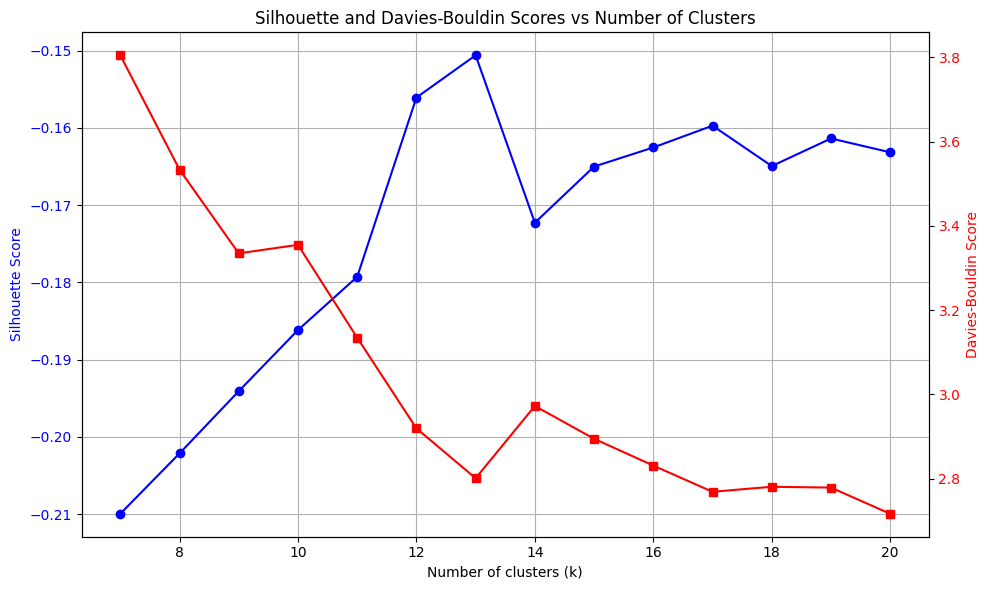

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import networkx as nx

adj_matrix = nx.adjacency_matrix(graph).todense()

best_k_newman = None
best_sil_score = -1
scores_silhouette = []
scores_davies = []

for k in range(7, 21):
    spectral_clustering = SpectralClustering(n_clusters=k, affinity='precomputed', random_state=42)
    cluster_labels_pred = spectral_clustering.fit_predict(adj_matrix)

    spectral_communities = [[] for _ in range(k)]
    for i, label in enumerate(cluster_labels_pred):
        spectral_communities[label].append(i)

    cluster_labels = np.zeros(graph.number_of_nodes(), dtype=int)
    for i, community in enumerate(spectral_communities):
        cluster_labels[community] = i

    # Silhouette score (using euclidean metric on adjacency matrix rows)
    sil_score = silhouette_score(adj_matrix, cluster_labels, metric='euclidean')

    # Davies-Bouldin score (same metric and data)
    db_score = davies_bouldin_score(adj_matrix, cluster_labels)

    scores_silhouette.append(sil_score)
    scores_davies.append(db_score)

    print(f"Clusters: {k}, Silhouette: {sil_score:.4f}, Davies-Bouldin: {db_score:.4f}")

    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_k_newman = k

print(f"\nBest number of clusters according to silhouette score: {best_k_newman} with score: {best_sil_score:.4f}")

# Plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(range(7, 21), scores_silhouette, 'b-o', label='Silhouette Score')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Silhouette Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(range(7, 21), scores_davies, 'r-s', label='Davies-Bouldin Score')
ax2.set_ylabel('Davies-Bouldin Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Silhouette and Davies-Bouldin Scores vs Number of Clusters')
fig.tight_layout()
plt.show()


In [64]:
num_clusters = best_k_newman
spectral_clustering = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=42)

In [65]:
adj_matrix = nx.adjacency_matrix(graph).todense()

In [66]:
cluster_labels = spectral_clustering.fit_predict(adj_matrix)

In [67]:
spectral_communities = [[] for _ in range(num_clusters)]
for i, label in enumerate(cluster_labels):
    spectral_communities[label].append(i)

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


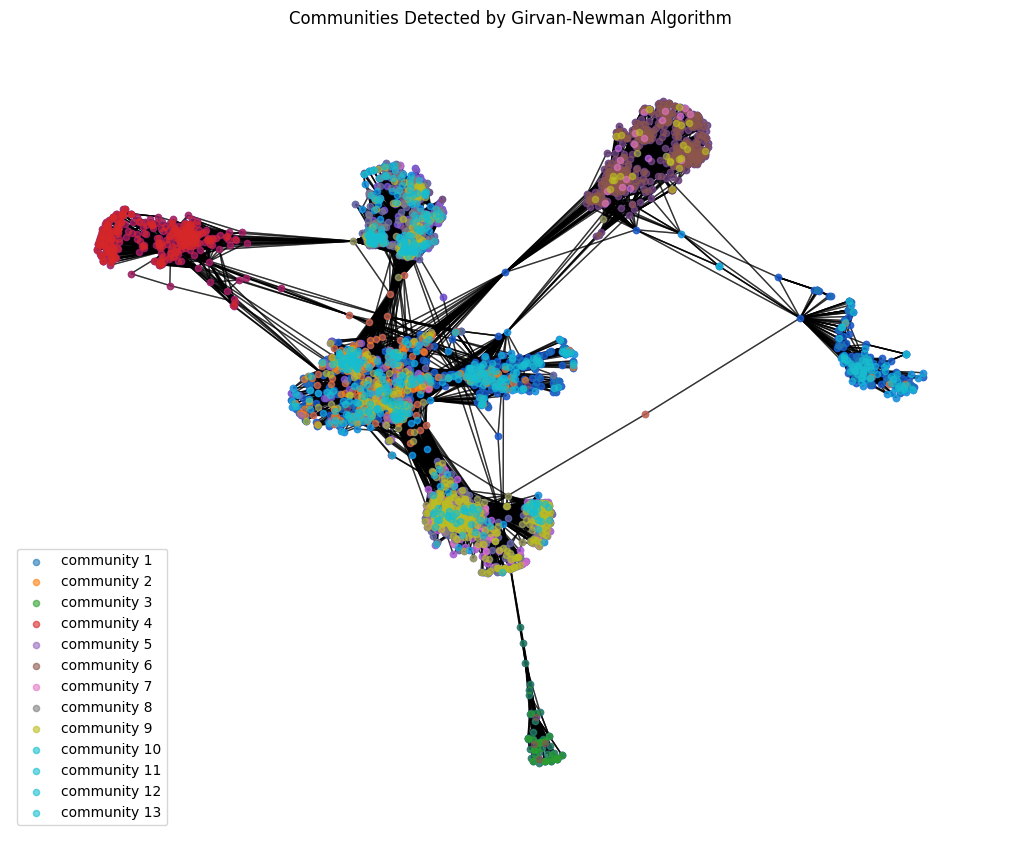

In [68]:
plt.figure(figsize=(10, 8))
nx.draw(graph, pos, node_size=20, node_color="blue", alpha=0.6, with_labels=False)
plt.title("Communities Detected by Girvan-Newman Algorithm")

# Plot nodes with community information
for i, community in enumerate(spectral_communities):
  nx.draw_networkx_nodes(graph, pos, nodelist=community, node_color=plt.cm.tab10(i), node_size=20, alpha=0.6, label=f"community {i+1}")
nx.draw_networkx_edges(graph, pos, alpha=0.5)
plt.legend()
plt.show()


## 9.1) Gurvan-newman metrics

In [69]:
spectral_modularity_score = nx.algorithms.community.modularity(graph, spectral_communities)

In [70]:
# Calculate normalized cut ratio
cut_ratios = []
for community in spectral_communities:
    cut_size = nx.cut_size(graph, community)
    normalized_cut = cut_size / len(community)
    cut_ratios.append(normalized_cut)
spectral_normalized_cut_ratio = np.mean(cut_ratios)

In [71]:
cluster_labels = np.zeros(graph.number_of_nodes())
for i, community in enumerate(spectral_communities):
    cluster_labels[community] = i
spectral_silhouette = silhouette_score(nx.adjacency_matrix(graph).todense(), cluster_labels, metric='euclidean')

In [72]:
spectral_compactness = total_compactness(spectral_communities, graph)
spectral_chbscore = calinski_harabasz_score(nx.adjacency_matrix(graph).todense(), cluster_labels)

In [73]:
spectral_separability = calculate_separability(spectral_communities, graph)

In [74]:
print(f"Spectral Modularity: {spectral_modularity_score}")
print(f"Spectral Normalized Cut Ratio: {spectral_normalized_cut_ratio}")
print(f"Spectral Silhouette Score: {spectral_silhouette}")
print(f"Spectral Total Compactness: {spectral_compactness}")
print(f"Spectral Calinski Harabasz Score: {spectral_chbscore}")
print(f"Spectral Separability: {spectral_separability}")

Spectral Modularity: 0.21925350204378496
Spectral Normalized Cut Ratio: 32.3169346499182
Spectral Silhouette Score: -0.15059749552229593
Spectral Total Compactness: 3.1113691796777885
Spectral Calinski Harabasz Score: 115.34874737016334
Spectral Separability: 37.33643015613346
